# Exploring Dandiset 001354: Hippocampal Responses to PAGER Activation

> **Note**: This notebook was generated with AI assistance. Please verify all code and results independently.

## Overview

This notebook explores Dandiset 001354 ([link](https://dandiarchive.org/dandiset/001354/0.250312.0036)), which contains intracellular electrophysiology recordings from mouse hippocampal CA1 neurons. The recordings examine neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor (PAGER) activation.

The notebook covers:
1. Loading and accessing data using the DANDI API
2. Examining NWB file structure and metadata
3. Visualizing electrophysiological recordings and stimuli
4. Analyzing response characteristics

## Required Packages

In [1]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
from dandi.dandiapi import DandiAPIClient

## Loading Data from DANDI Archive

In [2]:
# Initialize DANDI API client
client = DandiAPIClient()
dandiset = client.get_dandiset("001354", "0.250312.0036")

# Get URL for an example recording
url = next(dandiset.get_assets_by_glob(
    "sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb"
)).download_url

# Load NWB file via streaming
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Examining Recording Metadata

Let's look at key metadata about this recording:

In [3]:
# Print basic session information
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Recording date: {nwb.session_start_time}")
print(f"Target brain region: {nwb.lab_meta_data['DandiIcephysMetadata'].targeted_layer}")
print(f"Cell ID: {nwb.lab_meta_data['DandiIcephysMetadata'].cell_id}")

Subject ID: PK-109
Recording date: 2024-07-17 18:07:19-07:00
Target brain region: CA1
Cell ID: 2024_07_17_0009


## Analyzing Current Clamp Recordings

The data contains current clamp recordings with corresponding stimuli. Let's examine and plot an example recording:

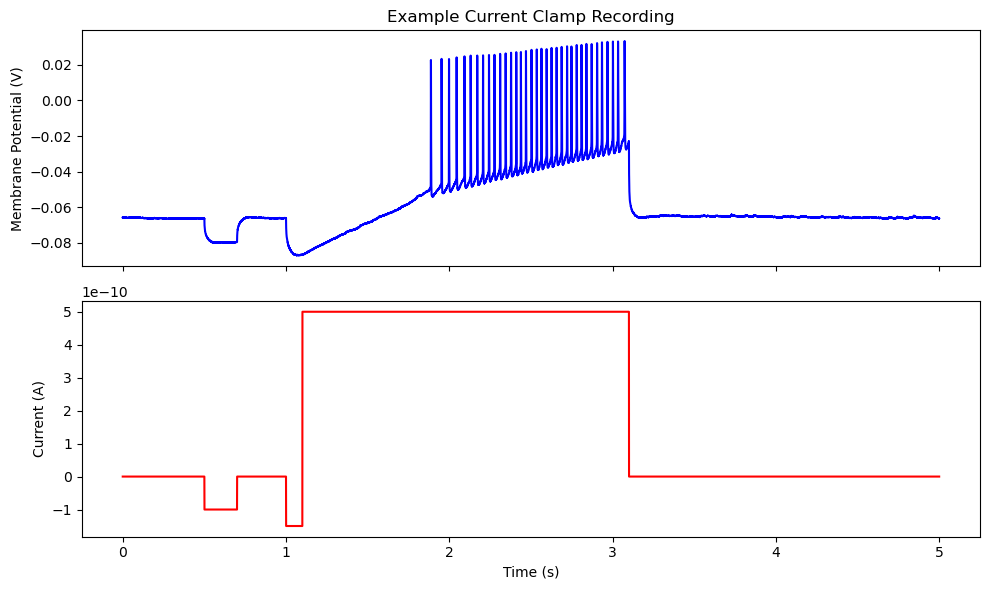

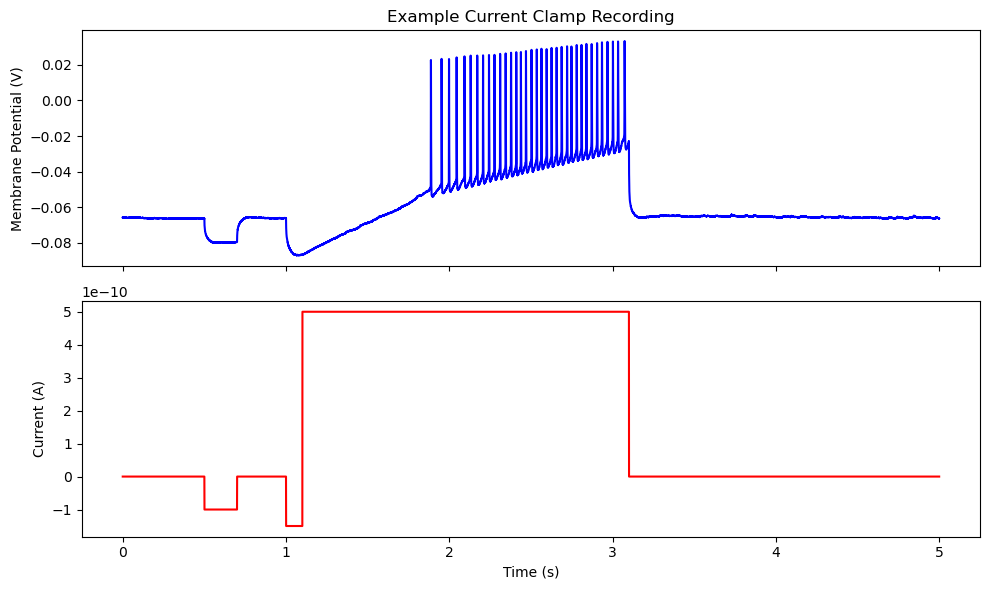

In [4]:
def plot_response_and_stimulus(response, stimulus, title):
    """Plot a current clamp recording and its corresponding stimulus."""
    time = np.arange(len(response.data)) / response.rate
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
    
    # Plot membrane potential
    ax1.plot(time, response.data * response.conversion, 'b')
    ax1.set_ylabel('Membrane Potential (V)')
    ax1.set_title(title)
    
    # Plot stimulus current
    ax2.plot(time, stimulus.data * stimulus.conversion, 'r')
    ax2.set_ylabel('Current (A)')
    ax2.set_xlabel('Time (s)')
    
    plt.tight_layout()
    return fig

# Plot first recording
response = nwb.acquisition['current_clamp-response-01-ch-0']
stimulus = nwb.stimulus['stimulus-01-ch-0']

plot_response_and_stimulus(response, stimulus, 'Example Current Clamp Recording')

## Multiple Sequential Recordings

The dataset contains multiple sequential recordings. Let's examine the timing structure:

In [5]:
# Get unique starting times of recordings
start_times = []
for key in nwb.acquisition.keys():
    if key.startswith('current_clamp-response'):
        start_times.append(nwb.acquisition[key].starting_time)

start_times = sorted(list(set(start_times)))

print("Recording start times (seconds):", start_times[:10])  # Show first 10 times

Recording start times (seconds): [0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0]


## Data Organization

The recordings are organized in sequential trials. Let's look at the recording structure:

In [6]:
# Print information about sequential recordings
seq_rec = nwb.icephys_sequential_recordings
print(f"Number of sequential recordings: {len(seq_rec.id)}")
print("\nStimulus types:")
print(seq_rec.stimulus_type[:])

Number of sequential recordings: 1

Stimulus types:
['ramp']


## Next Steps

This dataset enables various analyses:
- Characterization of membrane potential responses to PAGER activation
- Comparison of responses across different stimulus parameters
- Analysis of cellular excitability changes

The provided code can be adapted to load and analyze other recordings from this dataset.